### Objective: 
    To predict if an employee is going to resign or not. Uncover the factors that lead to employee attrition and explore how each feature is co-related with attrition.

### Dataset:
    We are using a dataset put up by IBM for our analysis. The dataset contain 35 features along with Attrition target variable. This is a fictional data set created by IBM data scientists. It can be downloaded from the following link Link- 
        
        https://www.ibm.com/communities/analytics/watson-analytics-blog/hr-employee-attrition/ 
                                                or 
        https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [51]:
# Importing all required libraries

%matplotlib inline
import os
import pandas as pd
from pandas import ExcelFile
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Understand the data

In [52]:
file_name = (r"C:\Users\Haritha\OneDrive\Desktop\Code for miniproject\HR-Employee-Attrition.csv")

emp_data = pd.read_csv(file_name)

print('Dataset dimension: {} rows, {} columns'.format(emp_data.shape[0], emp_data.shape[1]))

Dataset dimension: 1470 rows, 35 columns


In [53]:
# Metadata of IBM HR Employee Attrition dataset
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [54]:
emp_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [55]:
#numerical featres
emp_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<b>EmployeeNumber</b> can be removed as it is an unique representation of Employee and doesn't have any significance with attrition.<br>
<b>EmployeCount(1) and StandardHours(80)</b> has only 1 value which again won't help in our prediction model.


In [56]:
# Basic Statistics of categorical values

emp_data.describe(include=[np.object])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


<b> Over18 </b> has only one unique value which represents all employees are above 18 years of age, which again wont help in our prediction model. 

### Attrition Target Variable Distribution

In [57]:
attrition_freq = emp_data[['Attrition']].apply(lambda x: x.value_counts())
attrition_freq['frequency_percent'] = round((100 * attrition_freq / attrition_freq.sum()), 2)
print(attrition_freq)

     Attrition  frequency_percent
No        1233              83.88
Yes        237              16.12


### Attrition distribution bar plot

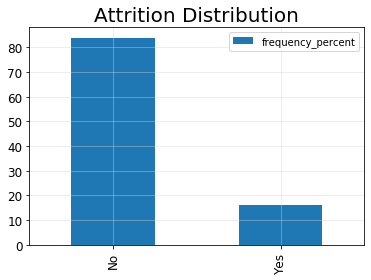

In [58]:
plot = attrition_freq[['frequency_percent']].plot(kind="bar");
plot.set_title("Attrition Distribution", fontsize=20)
plot.grid(color='lightgray', alpha=0.5)

## Exploratory Data analysis

### Identifying features with null values 
    To understand how each features are impacting the attrition indicator, we need to first handle the null / missing values

In [59]:
null_features = pd.DataFrame()
null_features['Null Count'] = emp_data.isnull().sum().sort_values(ascending=False)
null_features['Null Counts'] = null_features['Null Count'] / float(len(emp_data))
null_features = null_features[null_features['Null Counts'] > 0]

total_null_features = null_features.shape[0]
null_features_names = null_features.index
print('Total number of features having null values: ', total_null_features)
del null_features

Total number of features having null values:  0


### Categorical Features

In [60]:
emp_df = emp_data.copy() #copy cleaned dataset for Exploratory Data Analysis & feature changes

# Let's add 2 features for Exploratory Data Analysis: Employee left and not left
emp_df['Attrition_Yes'] = emp_df['Attrition'].map({'Yes':1, 'No':0}) # 1 means Employee Left
emp_df['Attrition_No'] = emp_df['Attrition'].map({'Yes':0, 'No':1}) # 1 means Employee didnt leave

# Let's look into the new dataset and identify features for which plots needs to be build for categorical features
emp_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,Attrition_No
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0,1
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0,1


In [61]:
## Get Categorical feature names
cat_col = emp_df.select_dtypes(include=[np.object]).columns.tolist()

print(cat_col)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [62]:
def generate_frequency_graph(col_name):
    
    # Plotting of Employee Attrition against feature(col_name)
    temp_grp = emp_df.groupby(col_name).agg('sum')[['Attrition_Yes', 'Attrition_No']]
    temp_grp['Percentage Attrition'] =  temp_grp['Attrition_Yes'] / (temp_grp['Attrition_Yes'] + temp_grp['Attrition_No']) * 100
    print(temp_grp)
    emp_df.groupby(col_name).agg('sum')[['Attrition_Yes', 'Attrition_No']].plot(kind='bar', stacked=False, color=['red', 'green'])
    plt.xlabel(col_name)
    plt.ylabel('Attrition')

                   Attrition_Yes  Attrition_No  Percentage Attrition
BusinessTravel                                                      
Non-Travel                    12           138              8.000000
Travel_Frequently             69           208             24.909747
Travel_Rarely                156           887             14.956855


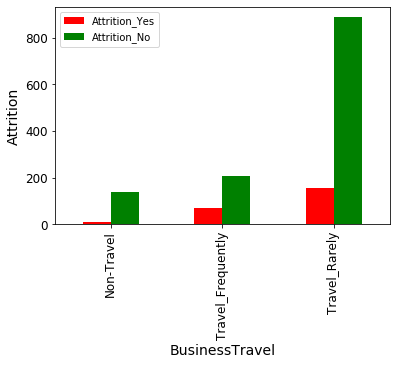

In [63]:
# Plotting of Employee Attrition against Business Travel feature
generate_frequency_graph('BusinessTravel')


               Attrition_Yes  Attrition_No  Percentage Attrition
MaritalStatus                                                   
Divorced                  33           294             10.091743
Married                   84           589             12.481426
Single                   120           350             25.531915


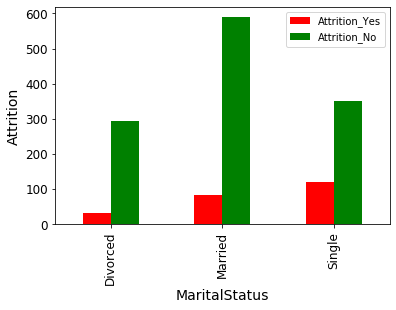

In [64]:
# Plotting of Employee Attrition against MaritalStatus feature
generate_frequency_graph('MaritalStatus')

                           Attrition_Yes  Attrition_No  Percentage Attrition
JobRole                                                                     
Healthcare Representative              9           122              6.870229
Human Resources                       12            40             23.076923
Laboratory Technician                 62           197             23.938224
Manager                                5            97              4.901961
Manufacturing Director                10           135              6.896552
Research Director                      2            78              2.500000
Research Scientist                    47           245             16.095890
Sales Executive                       57           269             17.484663
Sales Representative                  33            50             39.759036


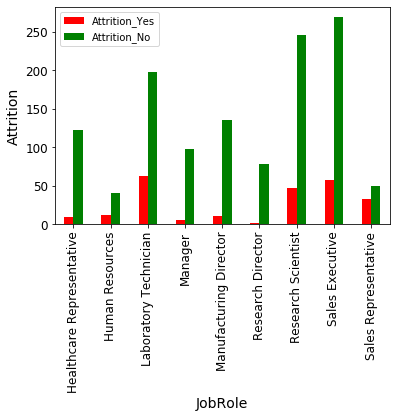

In [65]:
generate_frequency_graph('JobRole')

### Ordered Categorical Features

                 Attrition_Yes  Attrition_No  Percentage Attrition
JobSatisfaction                                                   
1                           66           223             22.837370
2                           46           234             16.428571
3                           73           369             16.515837
4                           52           407             11.328976


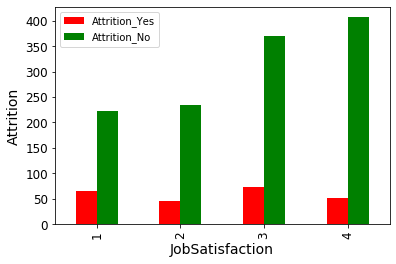

In [66]:
# 1-Low, 2-Medium, 3-High, 4-Very High
generate_frequency_graph('JobSatisfaction')
# Attrition is directly proportional to JobSatisfaction

                 Attrition_Yes  Attrition_No  Percentage Attrition
WorkLifeBalance                                                   
1                           25            55             31.250000
2                           58           286             16.860465
3                          127           766             14.221725
4                           27           126             17.647059


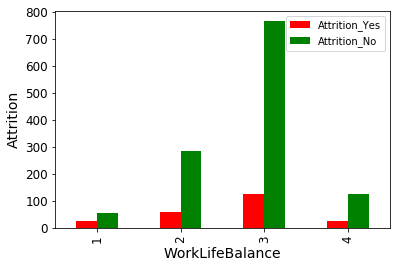

In [67]:
# 1-Bad, 2-Good, 3-Better, 4-Best
generate_frequency_graph('WorkLifeBalance')
# Attrition rate of Bad work life balance is high, however attrition rate of Best is higher than Good

                         Attrition_Yes  Attrition_No  Percentage Attrition
EnvironmentSatisfaction                                                   
1                                   72           212             25.352113
2                                   43           244             14.982578
3                                   62           391             13.686534
4                                   60           386             13.452915


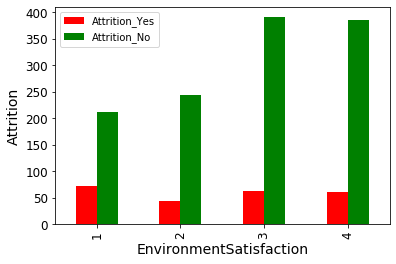

In [68]:
# 1-Bad, 2-Good, 3-Better, 4-Best
generate_frequency_graph('EnvironmentSatisfaction')
# Employee Attrition rate is high for Bad Environment

## Feature Engineering

### Addition of New Features
<b> Tenure per job </b>: 
    - Usually, people who have worked with many companies but for small periods at every organization tend to leave 
    early as they always need a change of Organization to keep them going.
<b> Years without Change </b>:
    - For any person, a change either in role or job level or responsibility is needed to keep the work exciting to continue.
    We create a variable to see how many years it has been for an employee without any sort of change using Promotion, Role and 
    Job Change as a metric to cover different variants of change.
<b> Compensation Ratio</b>: 
    - Compa Ratio is the ratio of the actual pay of an Employee to the midpoint of a salary range. The salary range can be that 
    of his/her department or organization or role. The benchmark numbers can be a organization’s pay or Industry average.

In [69]:
emp_proc_df = emp_data.copy() # Copy cleaned dataset for feature engineering

emp_proc_df['TenurePerJob'] = 0
for i in range(0, len(emp_proc_df)):
    if emp_proc_df.loc[i,'NumCompaniesWorked'] > 0:
        emp_proc_df.loc[i,'TenurePerJob'] = emp_proc_df.loc[i,'TotalWorkingYears'] / emp_proc_df.loc[i,'NumCompaniesWorked']

emp_proc_df['YearWithoutChange1'] = emp_proc_df['YearsInCurrentRole'] - emp_proc_df['YearsSinceLastPromotion']
emp_proc_df['YearWithoutChange2'] = emp_proc_df['TotalWorkingYears'] - emp_proc_df['YearsSinceLastPromotion']

monthly_income_median = np.median(emp_proc_df['MonthlyIncome'])
emp_proc_df['CompRatioOverall'] = emp_proc_df['MonthlyIncome'] / monthly_income_median

print('Dataset dimension: {} rows, {} columns'.format(emp_proc_df.shape[0], emp_proc_df.shape[1]))


Dataset dimension: 1470 rows, 39 columns


## Remove Unnecessary Observations

- Above we have identified during EDA that there are some features which has only 1 value resulting into very minimal variations. Hence, those observations can be removed.
- We need to remove EmployeeNumber, EmployeeCount, StandardHours & Over18 which doesn't have any significance on attrition. We made this inference at the top while describing dataset.

In [70]:
# Features to remove
feat_to_remove = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']

emp_proc_df.drop( feat_to_remove , axis = 1, inplace = True )
print('Dataset dimension: {} rows, {} columns'.format(emp_proc_df.shape[0], emp_proc_df.shape[1]))

Dataset dimension: 1470 rows, 35 columns


In [71]:
full_col_names = emp_proc_df.columns.tolist()
num_col_names = emp_proc_df.select_dtypes(include=[np.int64,np.float64]).columns.tolist() # Get numerical feature names

# Preparing list of ordered categorical features
num_cat_col_names = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
                     'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'StockOptionLevel']

target = ['Attrition']

num_col_names = list(set(num_col_names) - set(num_cat_col_names)) # Numerical features w/o Ordered Categorical features
cat_col_names = list(set(full_col_names) - set(num_col_names) - set(target)) # Categorical & Ordered Categorical features

print('Total number of numerical features: ', len(num_col_names))
print('Total number of categorical & ordered categorical features: ', len(cat_col_names))

cat_emp_df = emp_proc_df[cat_col_names]
num_emp_df = emp_proc_df[num_col_names]

Total number of numerical features:  18
Total number of categorical & ordered categorical features:  16


### Transform Numerical Features
#### In order to fix the skewness, let’s take the log for all numerical features with an absolute skew greater than 80% (Note: log+1, to avoid division by zero issues).

In [72]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (16, 4)

pd.options.display.max_columns = 500

In [73]:
# Let's create dummy variables for each categorical attribute for training our calssification model
for col in num_col_names:
    if num_emp_df[col].skew() > 0.80:
        num_emp_df[col] = np.log1p(num_emp_df[col])

num_emp_df.head()

,CompRatioOverall,MonthlyIncome,YearWithoutChange2,TotalWorkingYears,DailyRate,NumCompaniesWorked,PercentSalaryHike,Age,TrainingTimesLastYear,YearWithoutChange1,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyRate,DistanceFromHome,HourlyRate,TenurePerJob,YearsAtCompany
0,0.796758,8.698514,2.197225,2.197225,1102,2.197225,2.484907,41,0,4,1.609438,0.000000,1.791759,19479,0.693147,94,0.693147,1.945910
1,0.714368,8.543056,2.302585,2.397895,279,0.693147,3.178054,49,3,6,2.079442,0.693147,2.079442,24907,2.197225,61,2.397895,2.397895
2,0.354090,7.645398,2.079442,2.079442,1373,1.945910,2.772589,37,3,0,0.000000,0.000000,0.000000,2396,1.098612,92,0.773190,0.000000
3,0.464602,7.975908,1.791759,2.197225,1392,0.693147,2.484907,33,3,4,2.079442,1.386294,0.000000,23159,1.386294,56,2.197225,2.197225
4,0.533578,8.151622,1.609438,1.945910,591,2.302585,2.564949,27,3,0,1.098612,1.098612,1.098612,16632,1.098612,40,0.510826,1.098612


## Transform Categorical Features
- Machine Learning model works only on numerical datasets, hence, we need to transform categorical features into numerical features.
- One of the best strategy is to convert each category value into a new column and assigns 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly but does have the downside of adding more columns to the data set. 
- This approach is also called as "One Hot Encoding". We can use Pandas feature get_dummies to achieve this transformation. 
- There is another way to handled ordered categorical feature is to give ordered value based on their definitions i.e Low-Meidum-High would be 1-2-3. We can try this approach some other time. But, this can be evaluated to check the performance of the model.

In [74]:
# Let's create dummy variables for each categorical attribute for training our calssification model
for col in cat_col_names:
    col_dummies = pd.get_dummies(cat_emp_df[col], prefix=col)
    cat_emp_df = pd.concat([cat_emp_df, col_dummies], axis=1)

# Use the pandas apply method to numerically encode our attrition target variable
attrition_target = emp_proc_df['Attrition'].map({'Yes':1, 'No':0})

# Drop categorical feature for which dummy variables have been created
cat_emp_df.drop(cat_col_names, axis=1, inplace=True)

cat_emp_df.head()

,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Education_1,Education_2,Education_3,Education_4,Education_5,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,OverTime_No,OverTime_Yes,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,PerformanceRating_3,PerformanceRating_4,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0


### Correlation of Numerical Features against Attrition

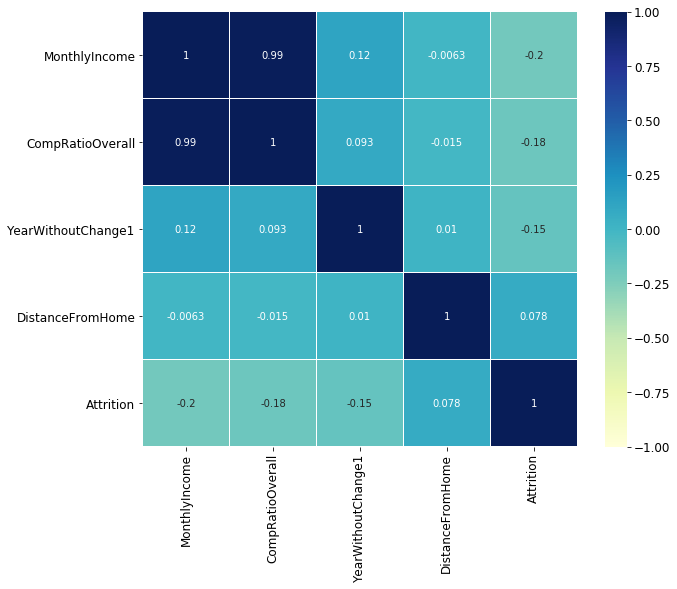

In [75]:
num_corr_df = num_emp_df[['MonthlyIncome', 'CompRatioOverall', 'YearWithoutChange1', 'DistanceFromHome']]
corr_df = pd.concat([num_corr_df, attrition_target], axis=1)
corr = corr_df.corr()

plt.figure(figsize = (10, 8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.axes_style("white")
#sns.heatmap(data=corr, annot=True, mask=mask, square=True, linewidths=.5, vmin=-1, vmax=1, cmap="YlGnBu")
sns.heatmap(data=corr, annot=True, square=True, linewidths=.5, vmin=-1, vmax=1, cmap="YlGnBu")
plt.show()

In [76]:
# Concat the two dataframes together columnwise
final_emp_df = pd.concat([num_emp_df, cat_emp_df], axis=1)

print('Dataset dimension after treating categorical features with dummy variables: {} rows, {} columns'.format(final_emp_df.shape[0], final_emp_df.shape[1]))
final_emp_df.head()

Dataset dimension after treating categorical features with dummy variables: 1470 rows, 82 columns


,CompRatioOverall,MonthlyIncome,YearWithoutChange2,TotalWorkingYears,DailyRate,NumCompaniesWorked,PercentSalaryHike,Age,TrainingTimesLastYear,YearWithoutChange1,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyRate,DistanceFromHome,HourlyRate,TenurePerJob,YearsAtCompany,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Education_1,Education_2,Education_3,Education_4,Education_5,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,OverTime_No,OverTime_Yes,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,PerformanceRating_3,PerformanceRating_4,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,0.796758,8.698514,2.197225,2.197225,1102,2.197225,2.484907,41,0,4,1.609438,0.000000,1.791759,19479,0.693147,94,0.693147,1.945910,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0
1,0.714368,8.543056,2.302585,2.397895,279,0.693147,3.178054,49,3,6,2.079442,0.693147,2.079442,24907,2.197225,61,2.397895,2.397895,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0
2,0.354090,7.645398,2.079442,2.079442,1373,1.945910,2.772589,37,3,0,0.000000,0.000000,0.000000,2396,1.098612,92,0.773190,0.000000,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0
3,0.464602,7.975908,1.791759,2.197225,1392,0.693147,2.484907,33,3,4,2.079442,1.386294,0.000000,23159,1.386294,56,2.197225,2.197225,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0
4,0.533578,8.151622,1.609438,1.945910,591,2.302585,2.564949,27,3,0,1.098612,1.098612,1.098612,16632,1.098612,40,0.510826,1.098612,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0


## Model Building and Validation

- Since, we have to predict a binary class, we will be using classification models for training & predicting Employee Attrition. We need to keep in mind that our focus should be to have a better accuracy of predicting attrition i.e. Attrition = 1 which in confusion matrix will be "True Positive". However, we should not forget the prediction accuracy of not qualifying for attrition i.e. Attrition = 0 which will be "True Negative" in confusion matrix.
- So, we need to focus on four parameters:
- **Accuracy**: 
    - Overall, how often is the classifier correct? i.e {(TP+TN)/Total}
- **True Positive Rate**: 
    - When it's actually yes, how often does it predict yes? default_ind = 1, {TP/Actual YES}, this is also known as "Sensitivity" or "Recall"
- **Precision**: 
    - When it predicts yes, how often is it correct? i.e. {TP/(TP+FP)}
- **Specificity**: 
    - When it's actually no, how often does it predict no? default_ind = 0, {TN/actual NO}
- **Cross Validation Score**: 
    - Cross Validation is a technique which involves reserving a particular sample of a dataset on which you do not train the model. Later, you test your model on this sample before finalizing it. Do this for k folds and take mean of accuracy scores of the k fold models.    
- **ROC Curve**: 
    - This is a commonly used graph that summarizes the performance of a classifier over all possible thresholds. It is generated by plotting the True Positive Rate (y-axis) against the False Positive Rate (x-axis) as you vary the threshold for assigning observations to a given class.

##  Prepare Train & Test Dataset

In [77]:
## The data should be divided into train and test data. We will use train_test_split feature to divide the data 
## and we will be using 70-30 ratio

In [78]:
# Import the train_test_split method
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Split data into train and test sets as well as for validation and testing
X_train, X_val, y_train, y_val = train_test_split(final_emp_df, attrition_target,
                                                  test_size= 0.30, random_state=42);

print("Stratified Sampling: ", len(X_train), "train set +", len(X_val), "validation set")


Stratified Sampling:  1029 train set + 441 validation set


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score

In [80]:
def gen_model_performance(actual_target, pred_target):
    model_conf_matrix = confusion_matrix(actual_target, pred_target)
    model_roc_score = roc_auc_score(actual_target, pred_target)
    model_accuracy = accuracy_score(actual_target, pred_target) * 100.0
    
    TP = model_conf_matrix[1][1]; TN = model_conf_matrix[0][0]; 
    FP = model_conf_matrix[0][1]; FN = model_conf_matrix[1][0];
    sensitivity = TP / float(TP + FN) * 100.0; specificity = TN / float(TN + FP) * 100.0;
    precision = TP / float(TP + FP) * 100.0;
    
    return sensitivity, specificity, model_accuracy, precision, model_roc_score

In [81]:
def evaluate_model_score(X, y, scoring='accuracy'):
    
    logreg_model = LogisticRegression(random_state=0)
    rfc_model = RandomForestClassifier()
    gboost_model = GradientBoostingClassifier()
    gnb_model = GaussianNB()

    models = [logreg_model,rfc_model, gboost_model, gnb_model]
    
    model_results = pd.DataFrame(columns = ["Model", "Accuracy", "Precision", "CV Score",
                                                            "Sensitivity","Specificity","ROC Score"])
    
    for model in models:
        model.fit(X, y,)
        y_pred = model.predict(X)
        score = cross_val_score(model, X, y, cv=5, scoring=scoring)
        
        sensitivity, specificity, accuracy, precision, roc_score = gen_model_performance(y, y_pred)
    
        scores = cross_val_score(model, X, y, cv=5)
    
        model_results = model_results.append({"Model": model.__class__.__name__,
                              "Accuracy": accuracy, "Precision": precision,
                              "CV Score": scores.mean()*100.0,
                              "Sensitivity": sensitivity, "Specificity": specificity,
                              "ROC Score": roc_score}, ignore_index=True)
    return model_results

## Train Models & Evaluate through Cross-Validation
#### We will train number of classification models i.e. Logistic Regression, Random Forest Classifier, Boosting Classifier and Naive Bayes. Once we build all the models, we will identify the best performer through accuracy, CV score, sensitivity & specificity parameters.

In [82]:
model_results = evaluate_model_score(X_train, y_train)

model_results

,Model,Accuracy,Precision,CV Score,Sensitivity,Specificity,ROC Score
0,LogisticRegression,85.519922,84.615385,84.934407,18.750000,99.296600,0.590233
1,RandomForestClassifier,100.000000,100.000000,85.033862,100.000000,100.000000,1.000000
2,GradientBoostingClassifier,96.209913,100.000000,85.713947,77.840909,100.000000,0.889205
3,GaussianNB,76.287658,39.696970,76.194648,74.431818,76.670574,0.755512


In [83]:
rfc_model = RandomForestClassifier();

refclasscol = X_train.columns

# fit random forest classifier on the training set
rfc_model.fit(X_train, y_train);

# extract important features
score = np.round(rfc_model.feature_importances_, 3)
importances = pd.DataFrame({'feature':refclasscol, 'importance':score})
importances = importances.sort_values('importance', ascending=False).set_index('feature')

# random forest classifier parameters used for feature importances
print(rfc_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


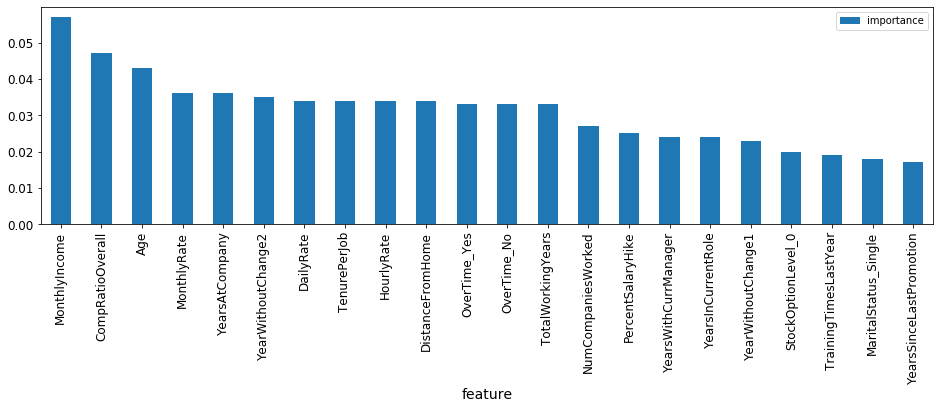

In [84]:
high_imp_df = importances[importances.importance>=0.015]
high_imp_df.plot.bar();
del high_imp_df

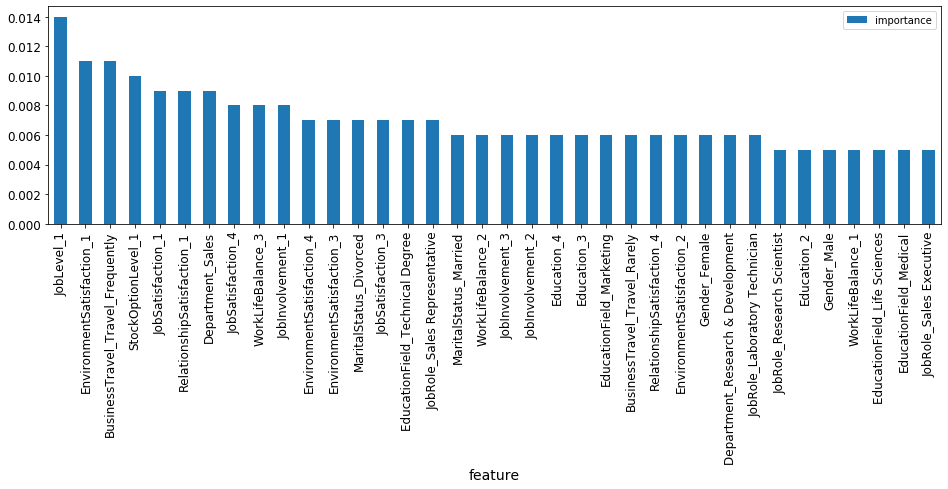

In [85]:
mid_imp_df = importances[importances.importance<=0.015]
mid_imp_df = mid_imp_df[mid_imp_df.importance>=0.0050]
mid_imp_df.plot.bar();
del mid_imp_df

- We can observe 1 model which performs very well i.e. RandomForestClassifier.
- Our goal is to identify whether employee will leave or not i.e. Attrition=1 which means our Sensitivity metric is the main evaluation metric along with Precision and Accuracy.

In [86]:
selection = SelectFromModel(rfc_model, threshold = 0.002, prefit=True)

X_train_select = selection.transform(X_train)
X_val_select = selection.transform(X_val)

print('Train dataset dimension before Feature Selection: {} rows, {} columns'.format(X_train.shape[0], X_train.shape[1]))
print('Train dataset dimension after Feature Selection: {} rows, {} columns'.format(X_train_select.shape[0], X_train_select.shape[1]))

Train dataset dimension before Feature Selection: 1029 rows, 82 columns
Train dataset dimension after Feature Selection: 1029 rows, 76 columns


## Train Feature Selected Models & Evaluate through Cross-Validation

#### We will train number of classification models i.e. Logistic Regression, Random Forest Classifier,gradient bosting and Naive Bayes. Once we build all the models, we will identify the best performer through accuracy, CV score, sensitivity & specificity parameters.

In [87]:
model_results = evaluate_model_score(X_train_select, y_train)

model_results

,Model,Accuracy,Precision,CV Score,Sensitivity,Specificity,ROC Score
0,LogisticRegression,83.381924,72.727273,85.132844,4.545455,99.648300,0.520969
1,RandomForestClassifier,100.000000,100.000000,85.325598,100.000000,100.000000,1.000000
2,GradientBoostingClassifier,96.209913,100.000000,85.130002,77.840909,100.000000,0.889205
3,GaussianNB,81.438290,46.987952,79.690268,66.477273,84.525205,0.755012


- We can see that after feature selection based on random forest classifier technique, metrics of random forest model has improved.



## Model Performance on Validation Dataset
#### For checking model performance sake, we can choose RandomForest Classifier as final model and build the model on training dataset. Once the model is built, let's see its performance on validation dataset which was never seen by this model. This will give us the true picture of the model, how it performs on unseen new data and what is the accuracy of prediction.

In [88]:
final_rfc_model = RandomForestClassifier()
final_rf_scores = cross_val_score(final_rfc_model, X_train_select, y_train, cv=5)

final_rfc_model.fit(X_train_select, y_train)
y_trn_pred = final_rfc_model.predict(X_train_select)
sensitivity, specificity, accuracy, precision, roc_score = gen_model_performance(y_train, y_trn_pred)

print("Train Accuracy: %.2f%%, Precision: %.2f%%, CV Mean Score=%.2f%%, Sensitivity=%.2f%%, Specificity=%.2f%%" % 
      (accuracy, precision, final_rf_scores.mean()*100.0, sensitivity, specificity))
print('***************************************************************************************\n')

y_val_pred = final_rfc_model.predict(X_val_select)
sensitivity, specificity, accuracy, precision, roc_score = gen_model_performance(y_val, y_val_pred)

print("Validation Accuracy: %.2f%%, Precision: %.2f%%, Sensitivity=%.2f%%, Specificity=%.2f%%" % (accuracy, precision, sensitivity, specificity))
print('***************************************************************************************\n')

Train Accuracy: 100.00%, Precision: 100.00%, CV Mean Score=85.33%, Sensitivity=100.00%, Specificity=100.00%
***************************************************************************************

Validation Accuracy: 86.62%, Precision: 62.50%, Sensitivity=8.20%, Specificity=99.21%
***************************************************************************************

